In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
file_directory = 'datasets/moex'
file_paths = glob.glob(os.path.join(file_directory, '*_moex_10m_data.csv'))

TATNP_moex_10m_data.csv - Количество выбросов: 0


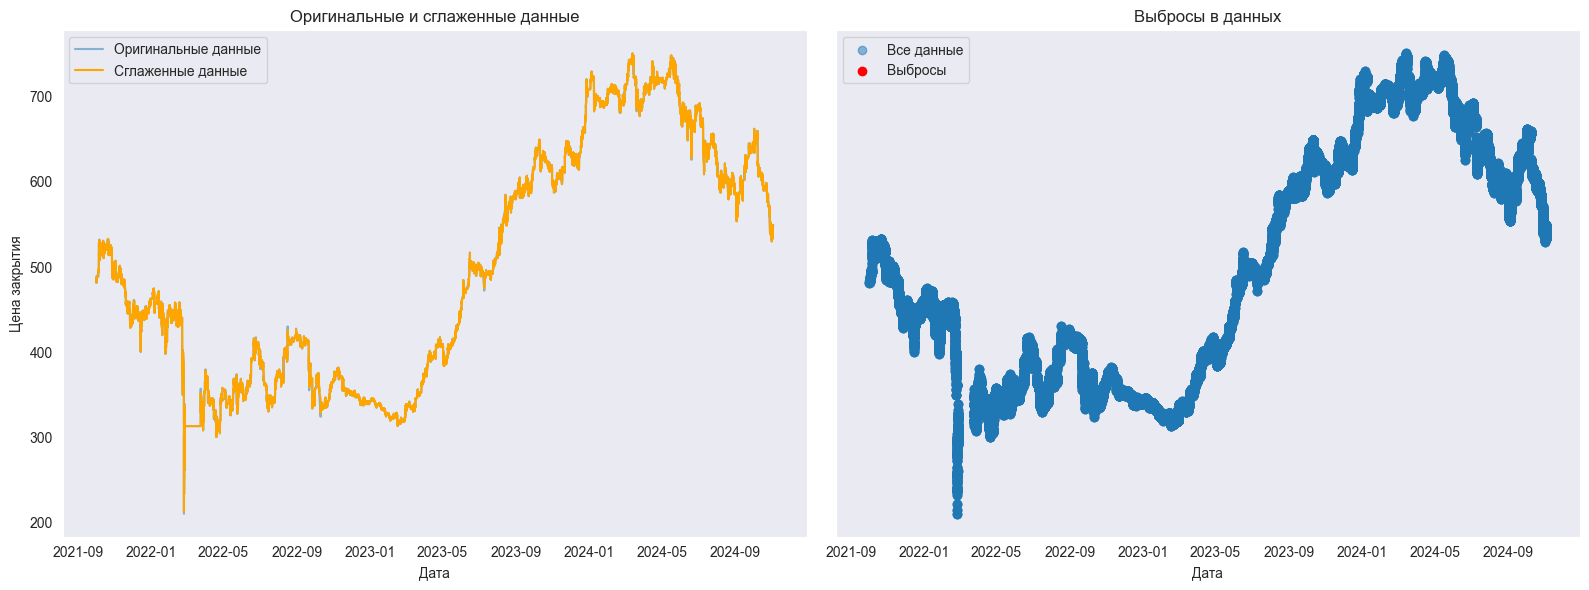

FEES_moex_10m_data.csv - Количество выбросов: 14290


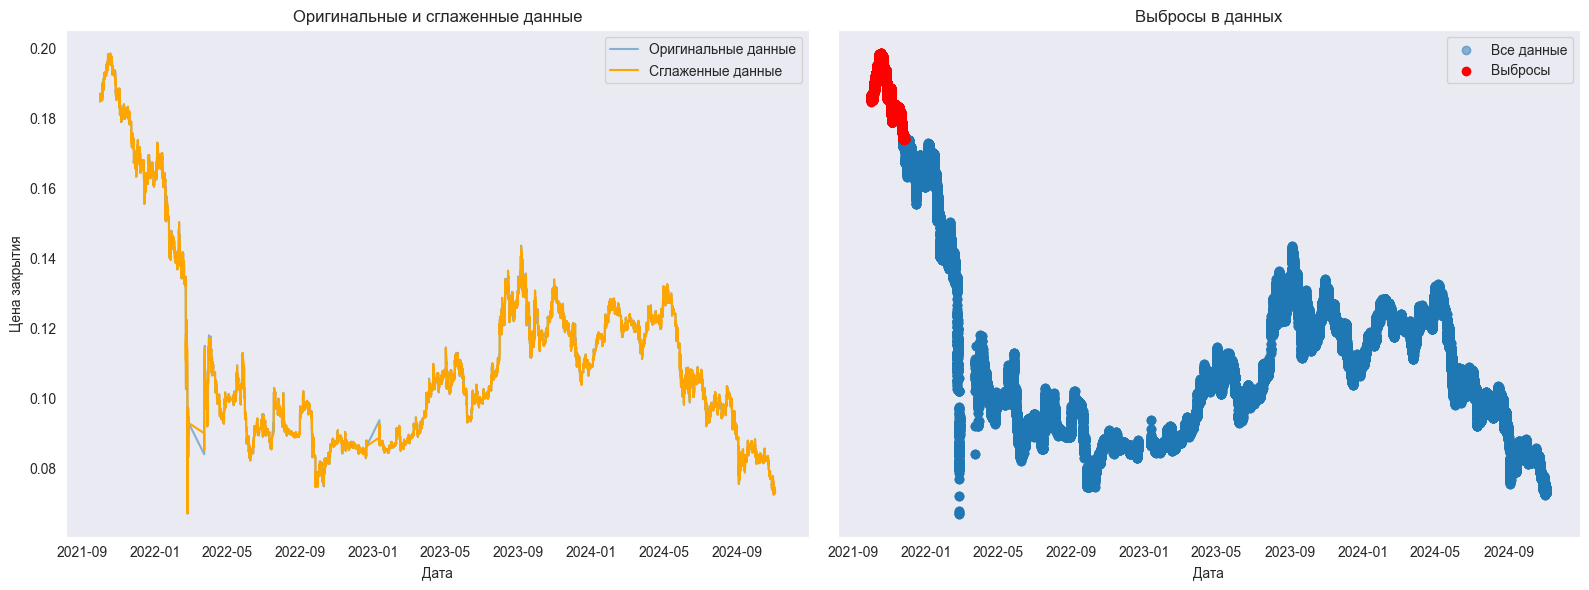

FIVE_moex_10m_data.csv - Количество выбросов: 0


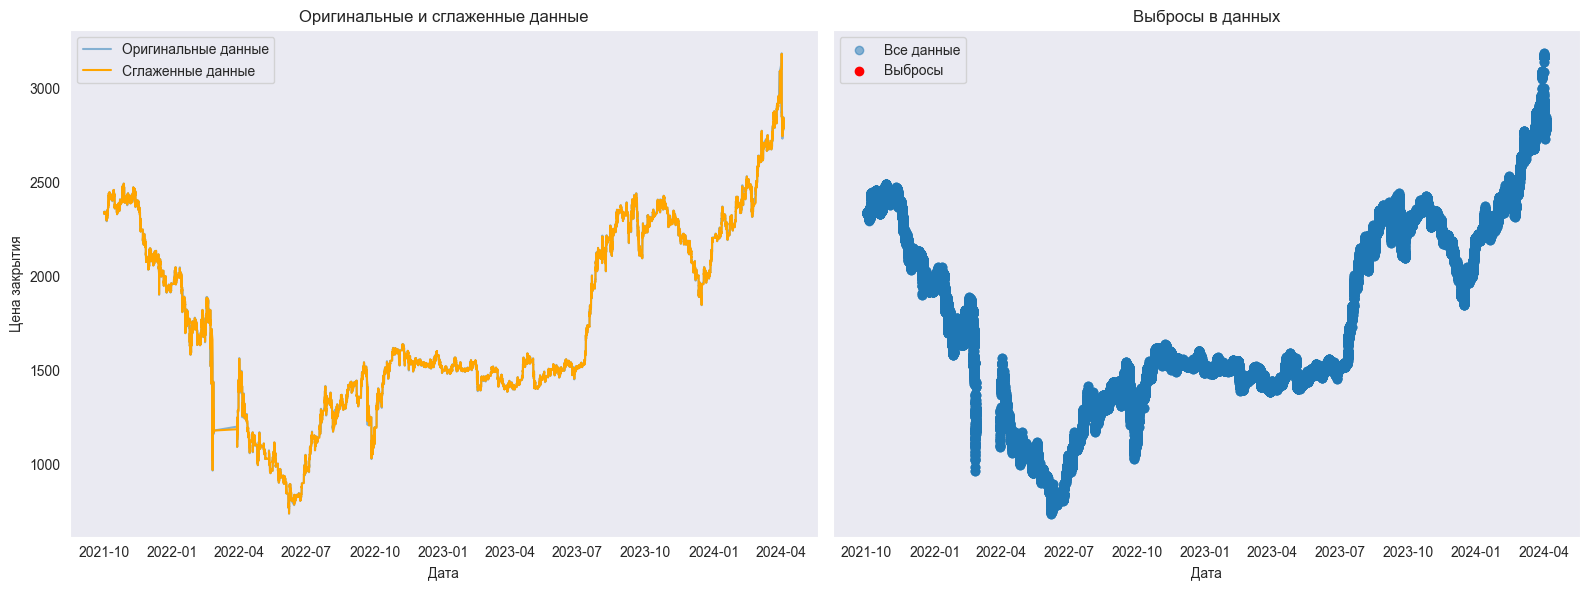

RTKM_moex_10m_data.csv - Количество выбросов: 0


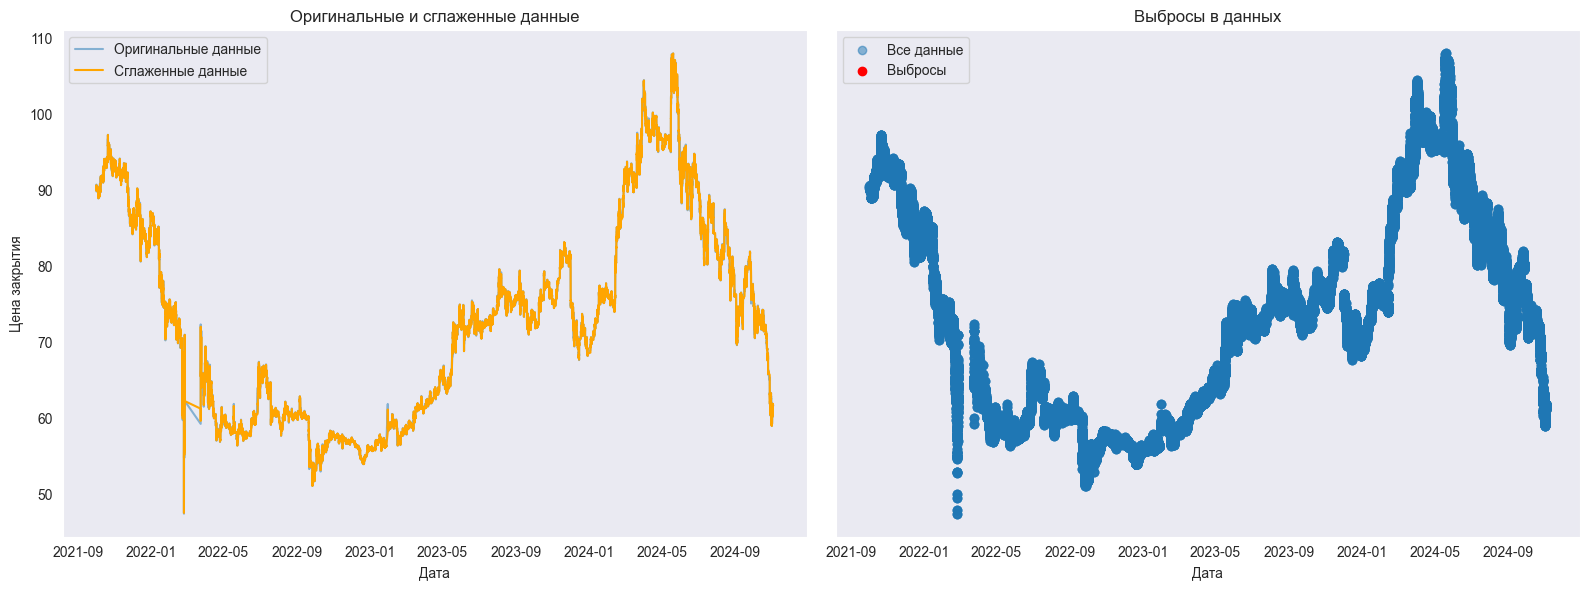

POSI_moex_10m_data.csv - Количество выбросов: 0


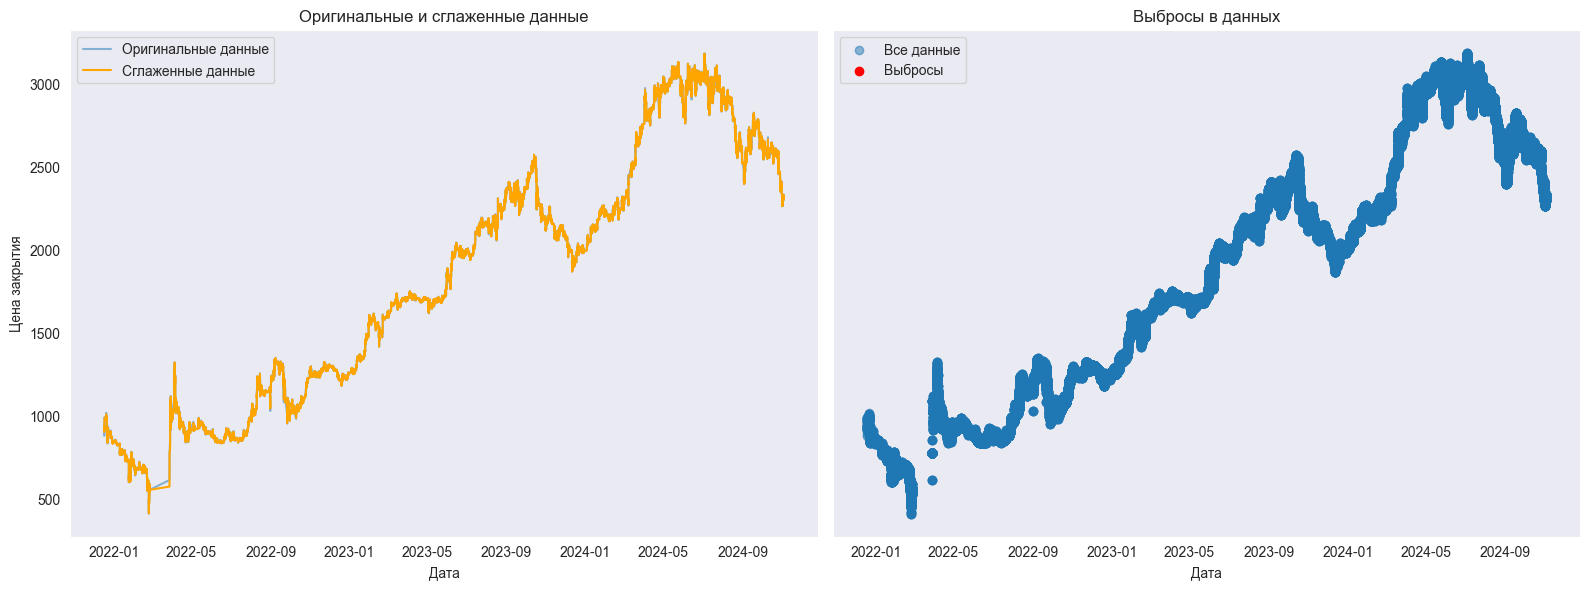

MTLRP_moex_10m_data.csv - Количество выбросов: 0


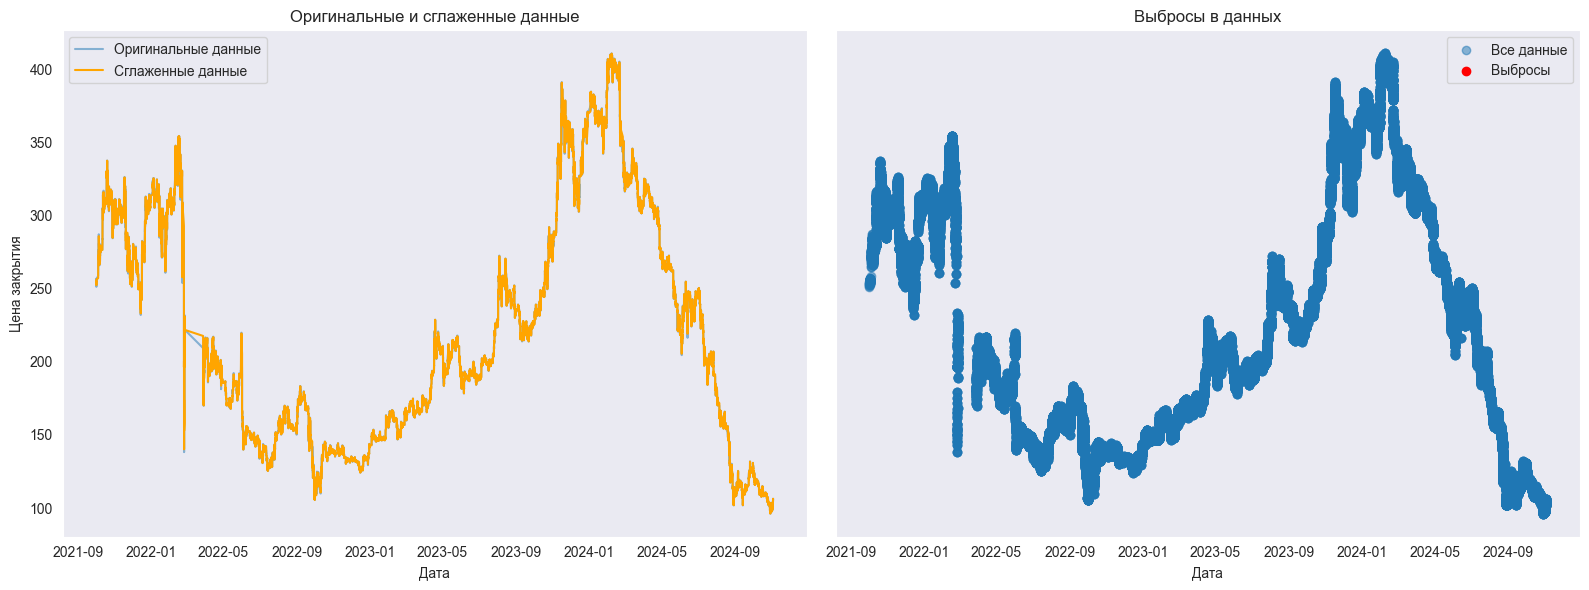

SBER_moex_10m_data.csv - Количество выбросов: 0


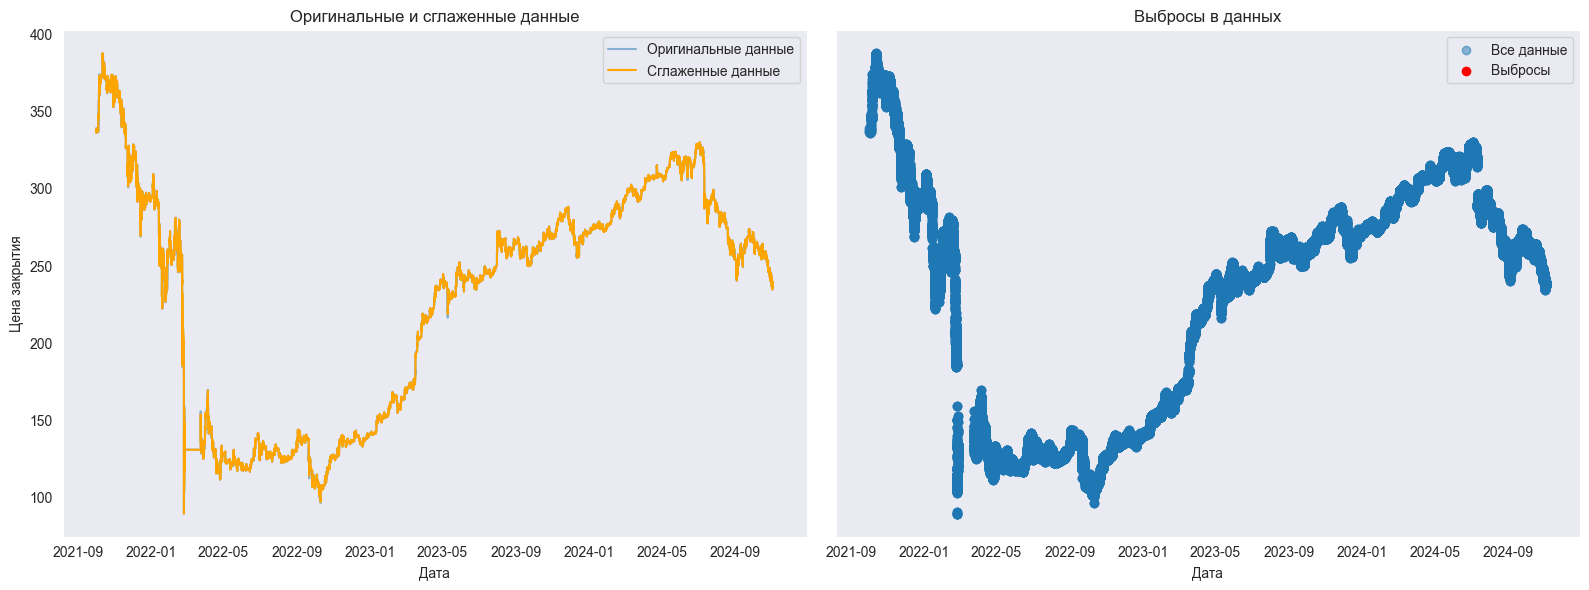

MGNT_moex_10m_data.csv - Количество выбросов: 115


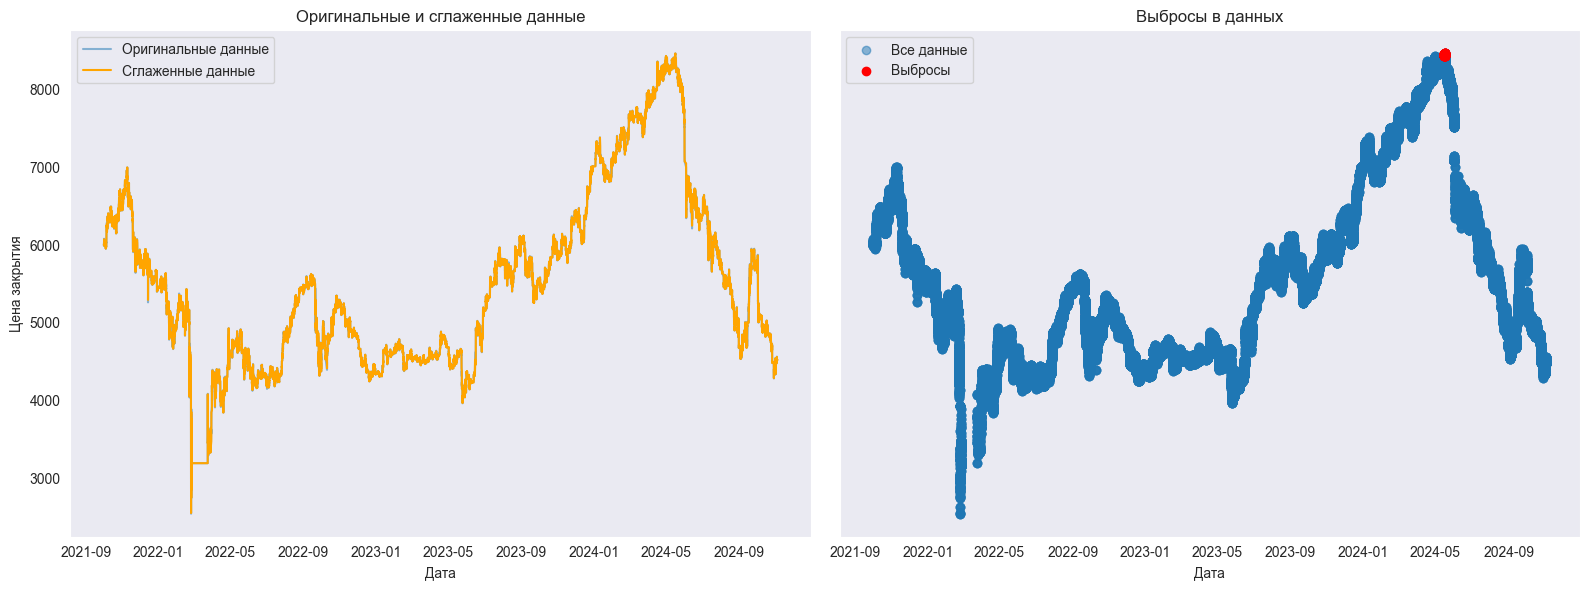

OZON_moex_10m_data.csv - Количество выбросов: 0


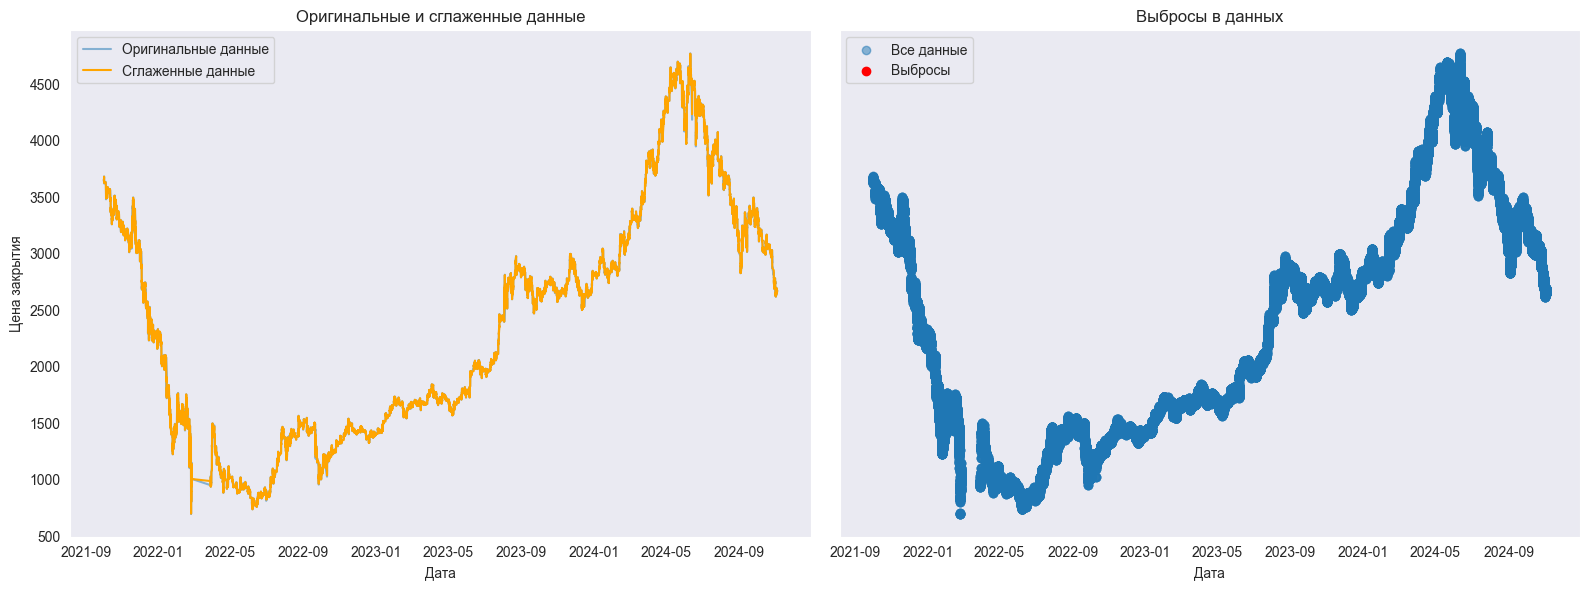

SELG_moex_10m_data.csv - Количество выбросов: 0


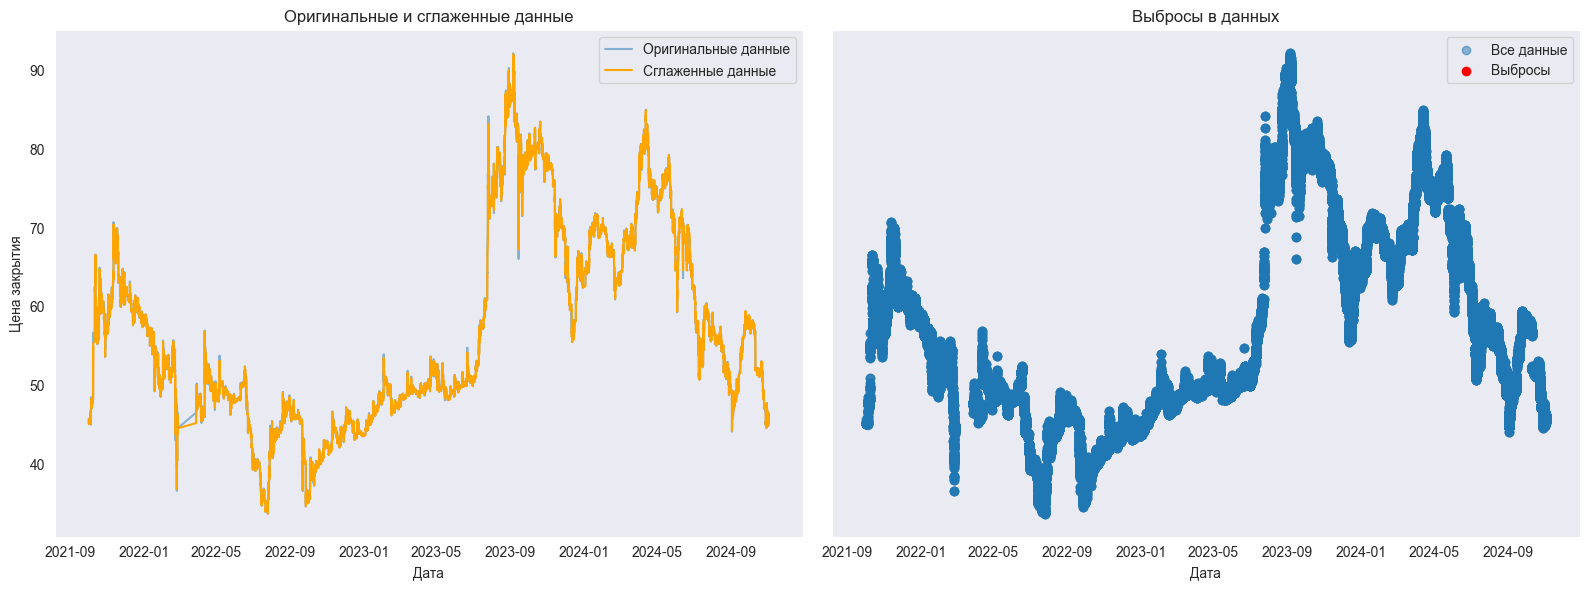

GAZP_moex_10m_data.csv - Количество выбросов: 57845


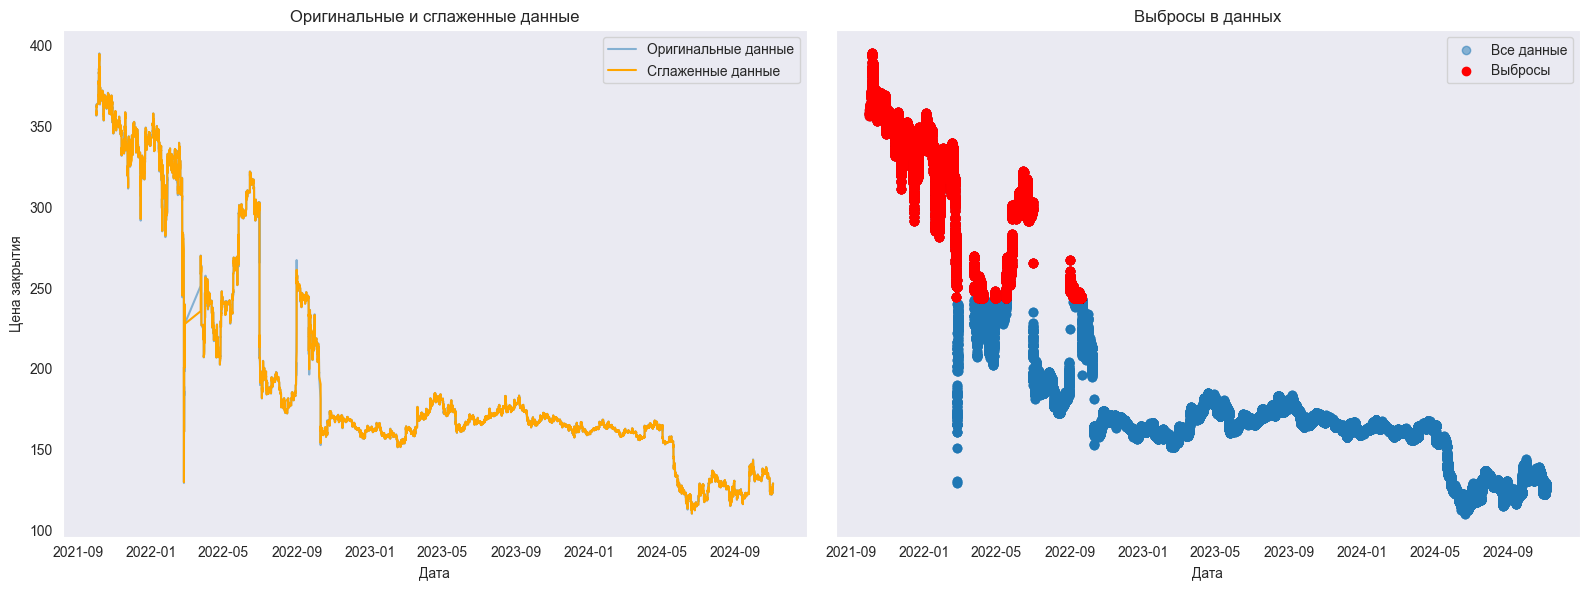

GMKN_moex_10m_data.csv - Количество выбросов: 66080


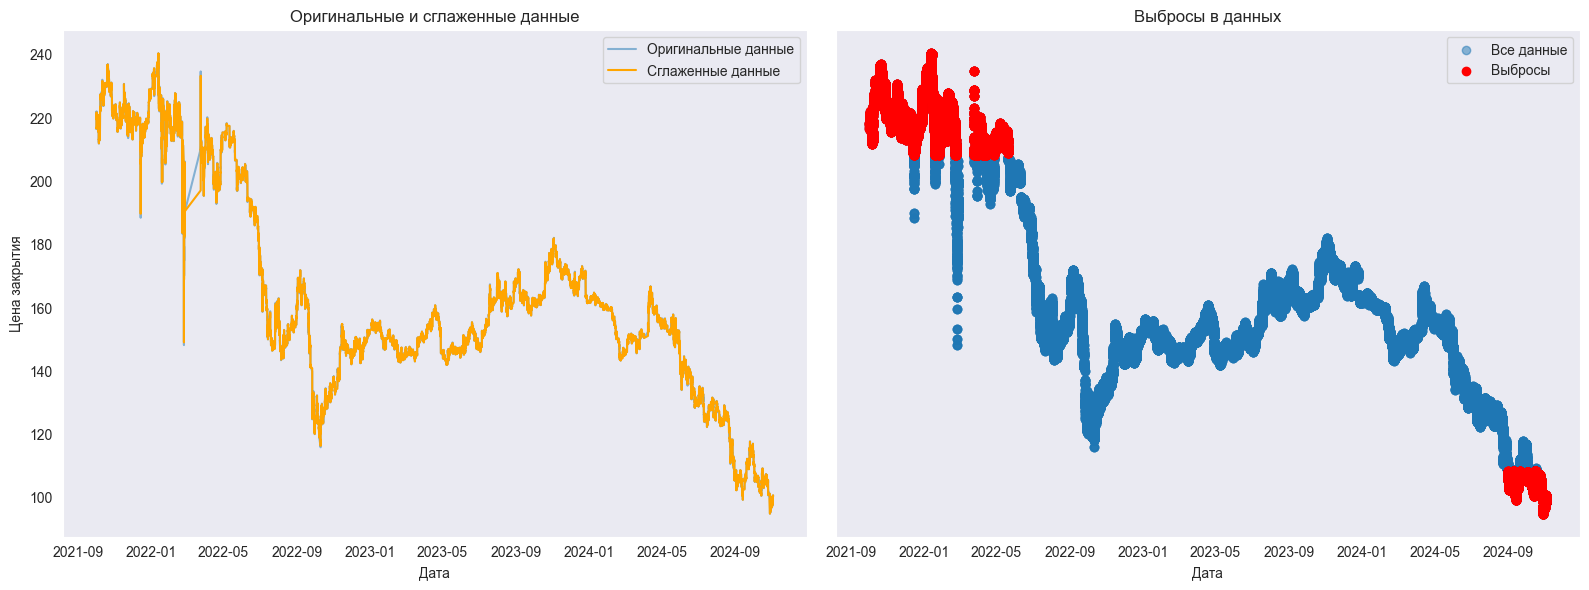

MTSS_moex_10m_data.csv - Количество выбросов: 0


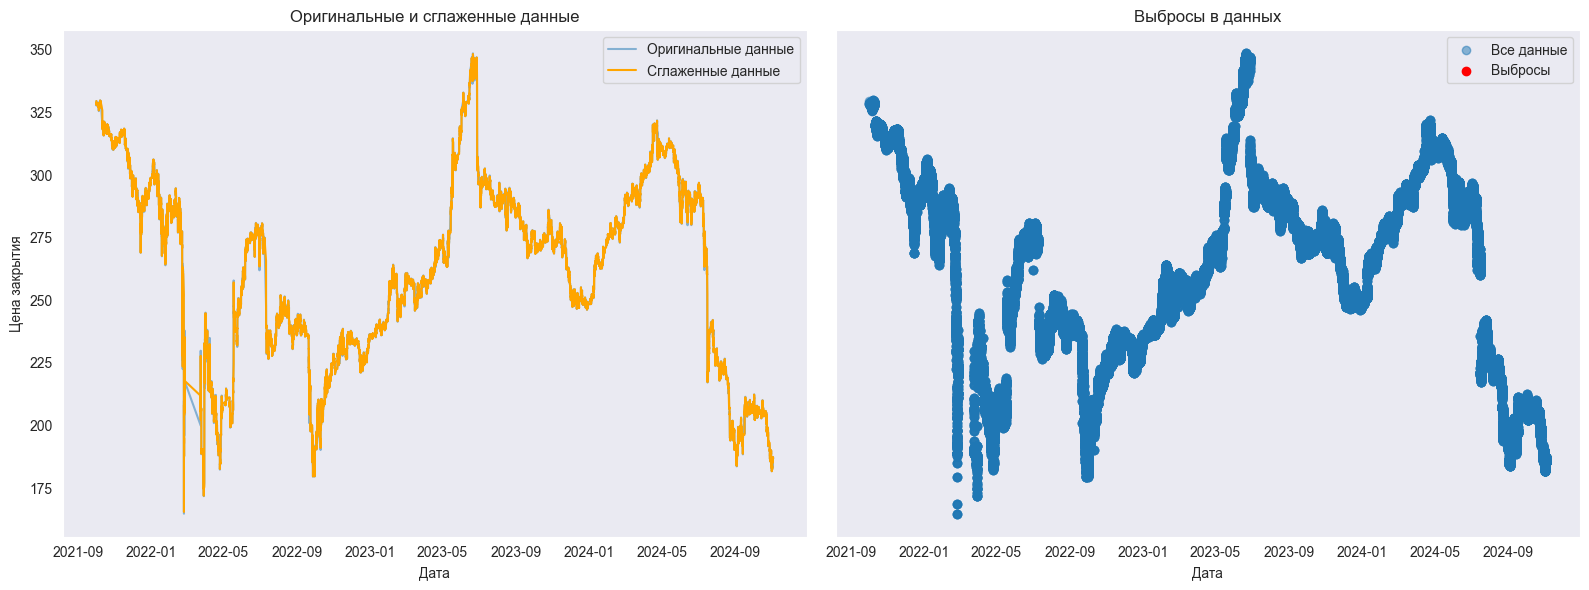

RUAL_moex_10m_data.csv - Количество выбросов: 55585


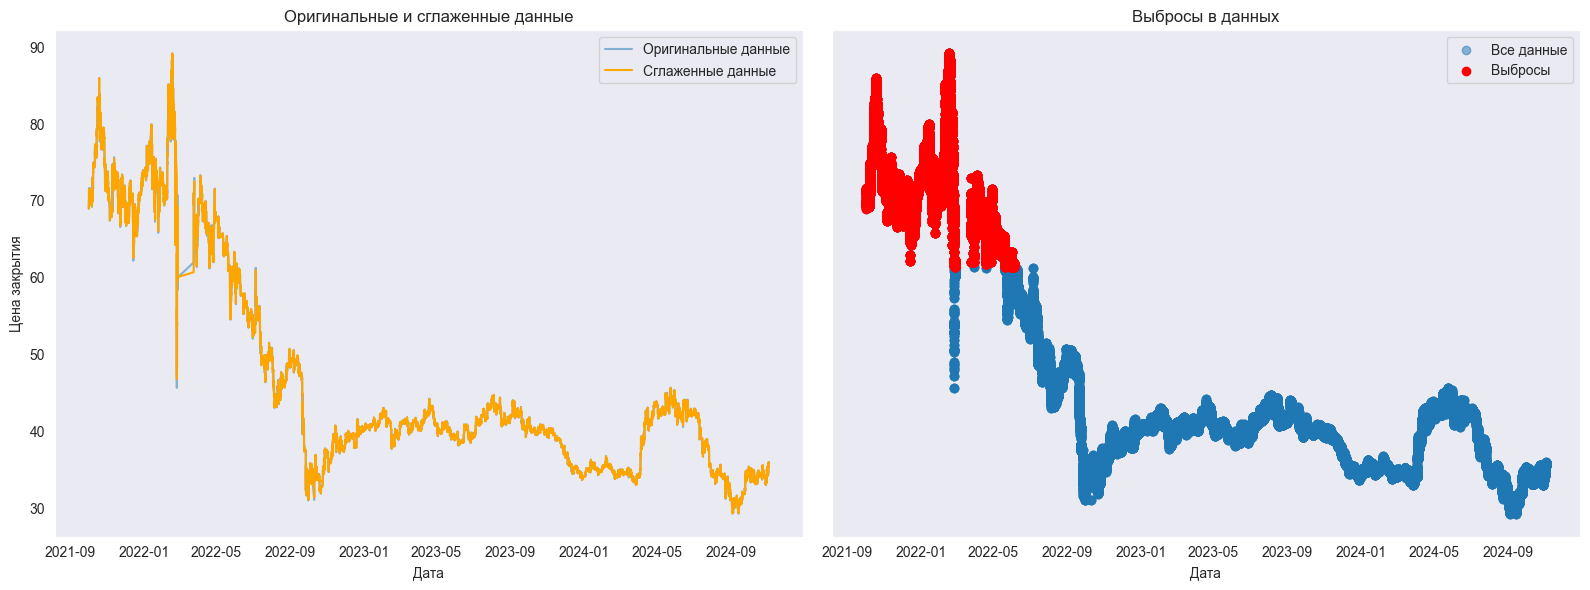

TRNFP_moex_10m_data.csv - Количество выбросов: 0


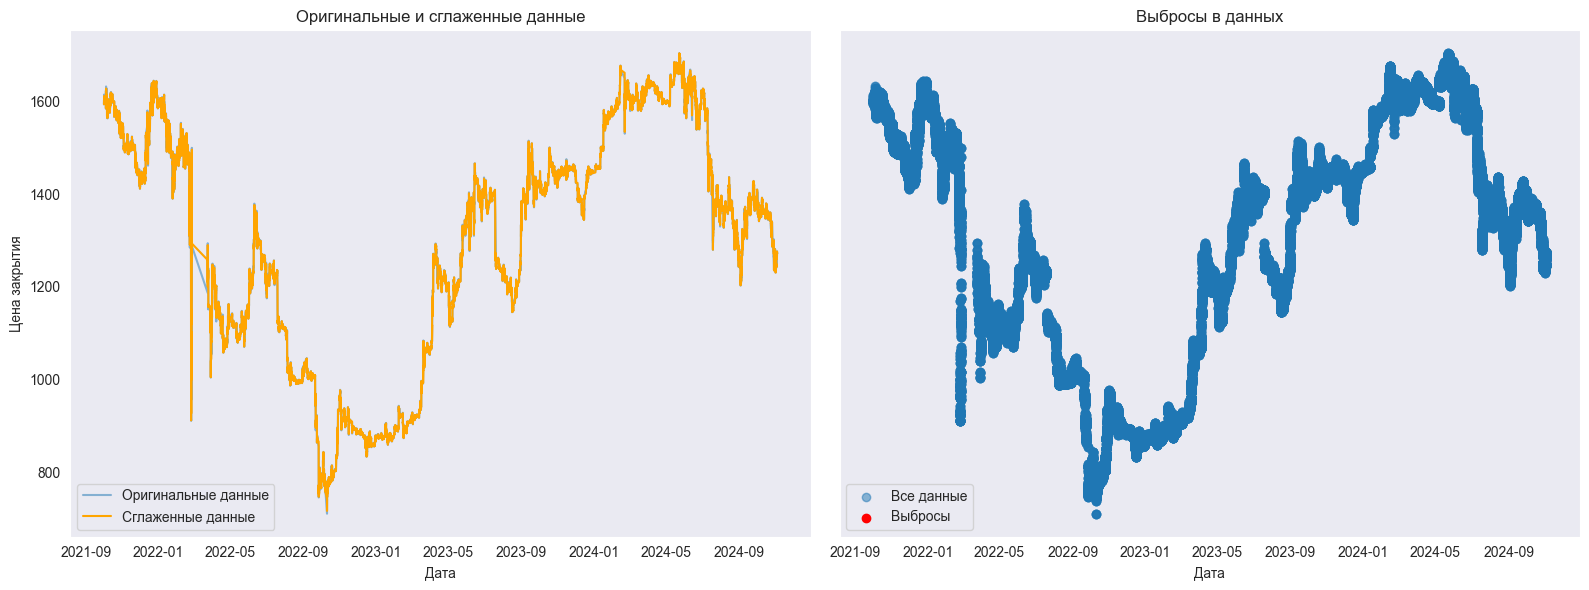

NVTK_moex_10m_data.csv - Количество выбросов: 0


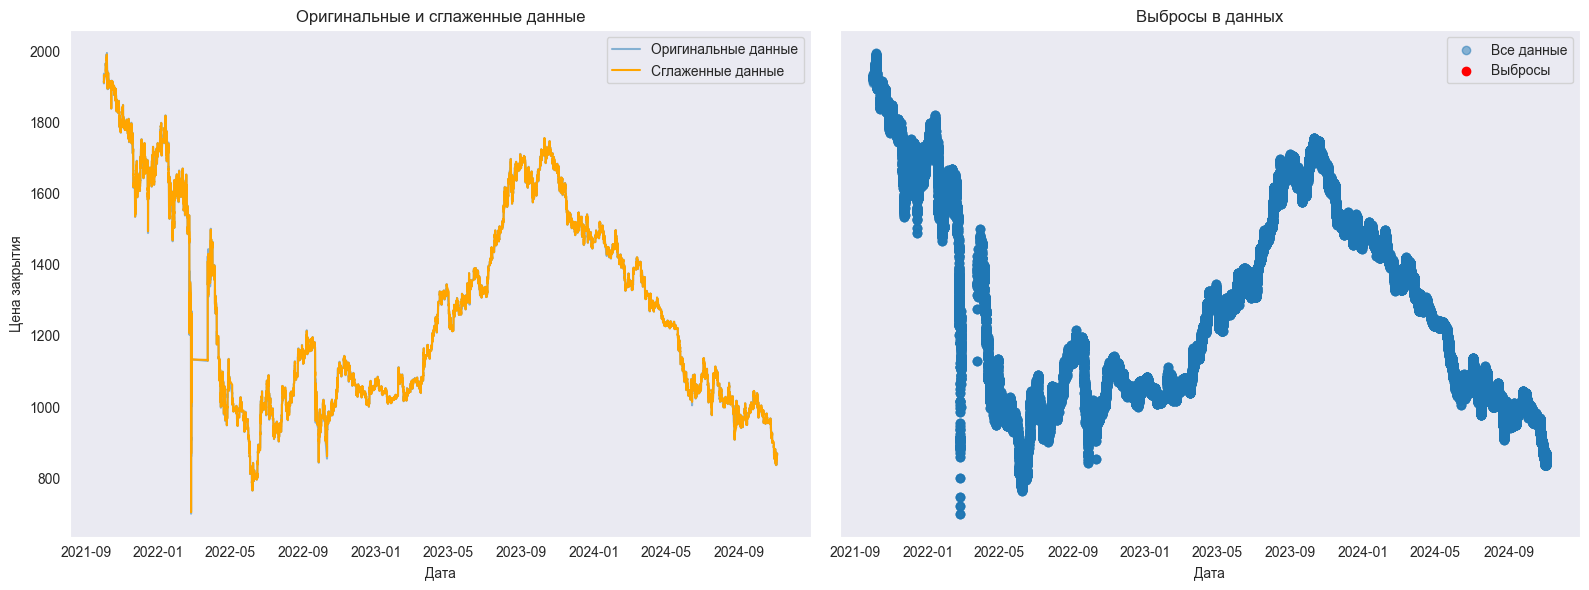

LEAS_moex_10m_data.csv - Количество выбросов: 0


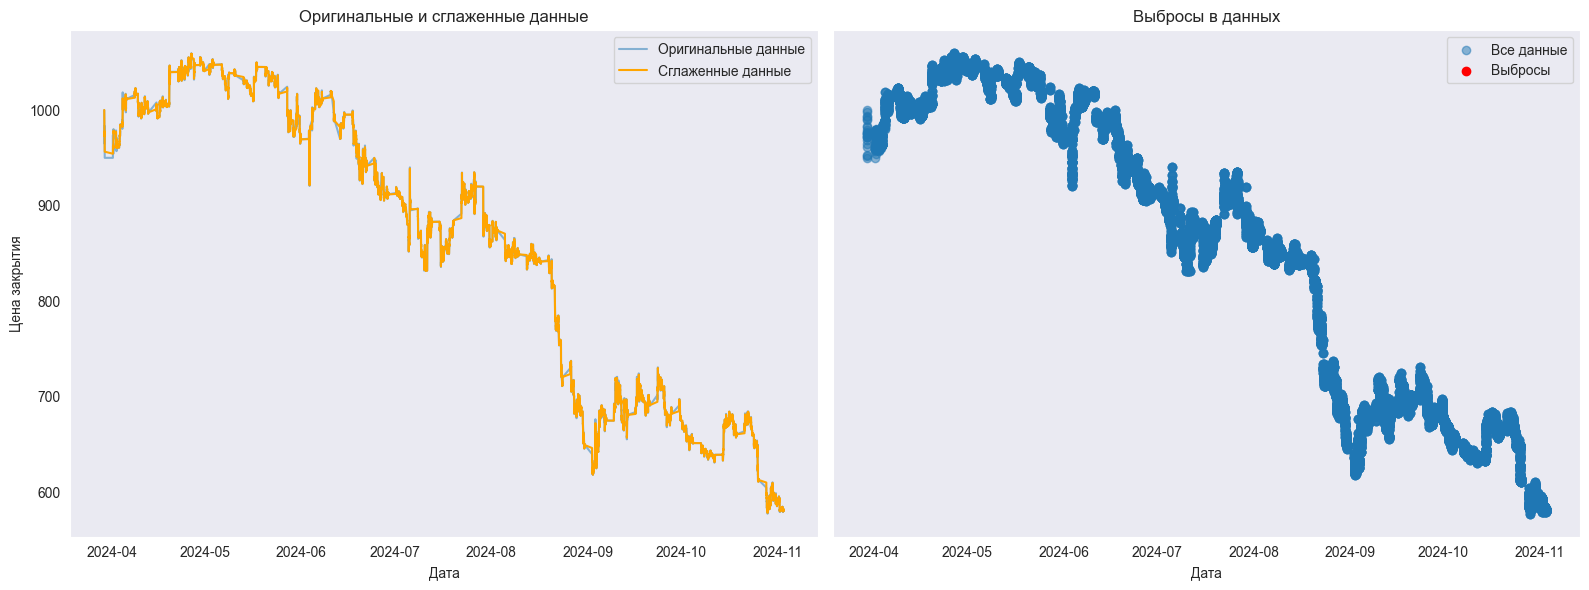

PLZL_moex_10m_data.csv - Количество выбросов: 1795


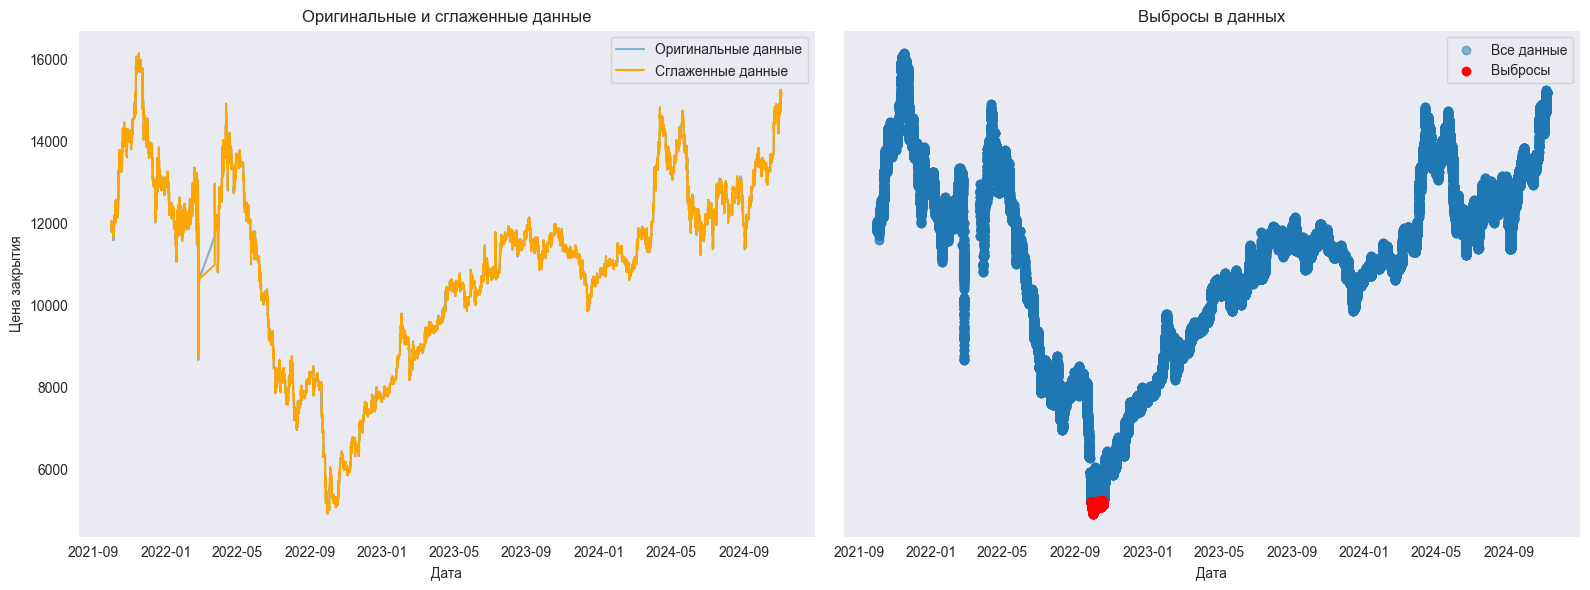

MOEX_moex_10m_data.csv - Количество выбросов: 0


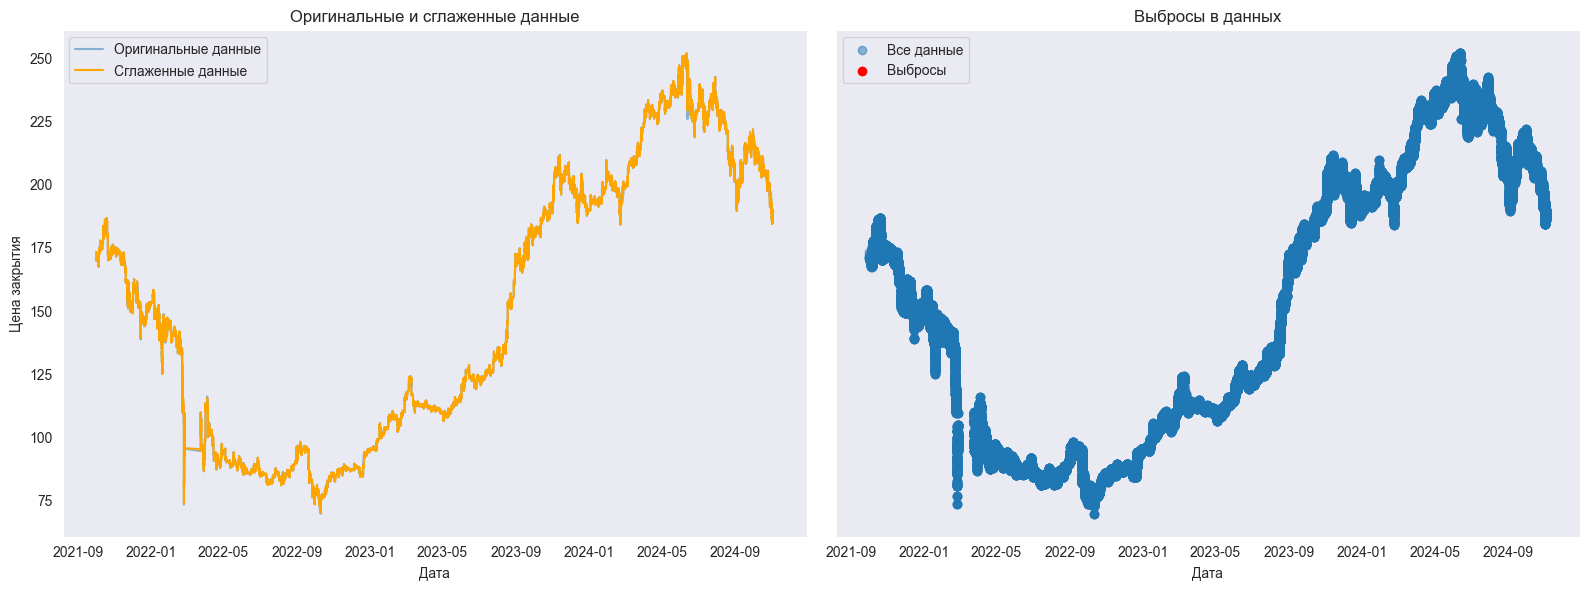

CHMF_moex_10m_data.csv - Количество выбросов: 0


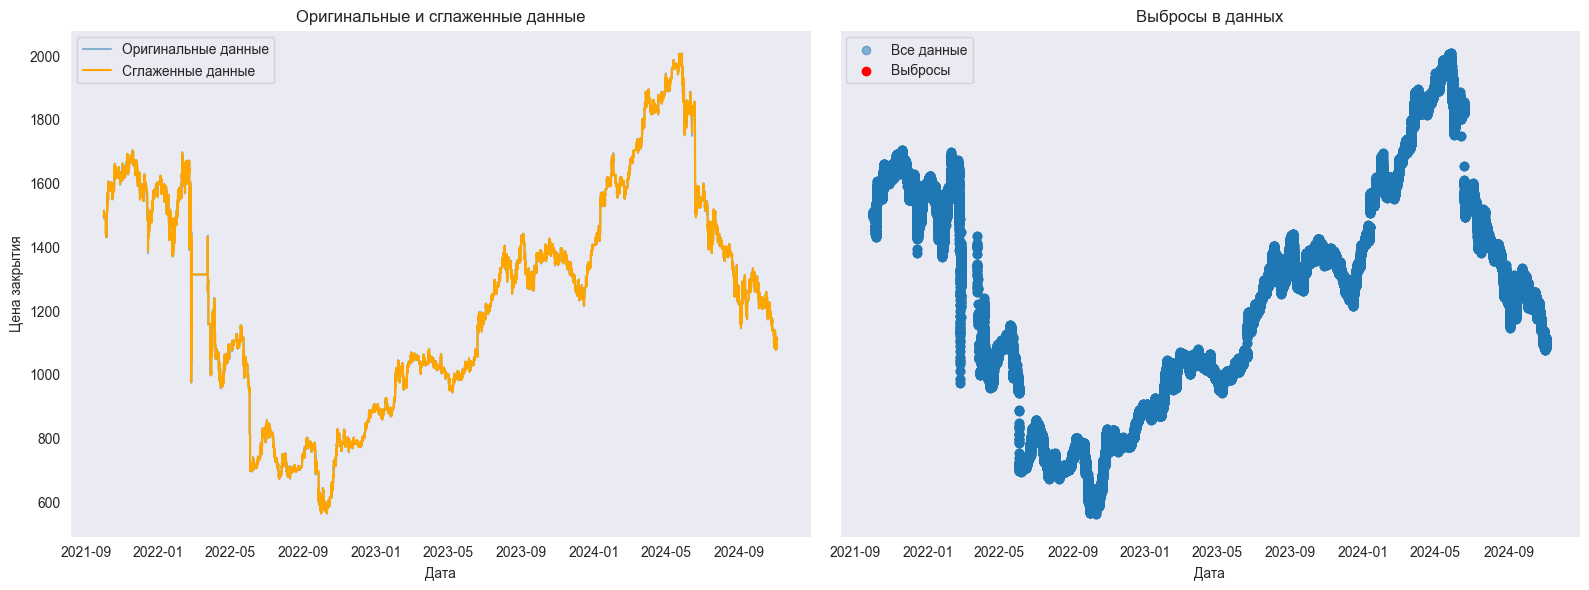

MSNG_moex_10m_data.csv - Количество выбросов: 0


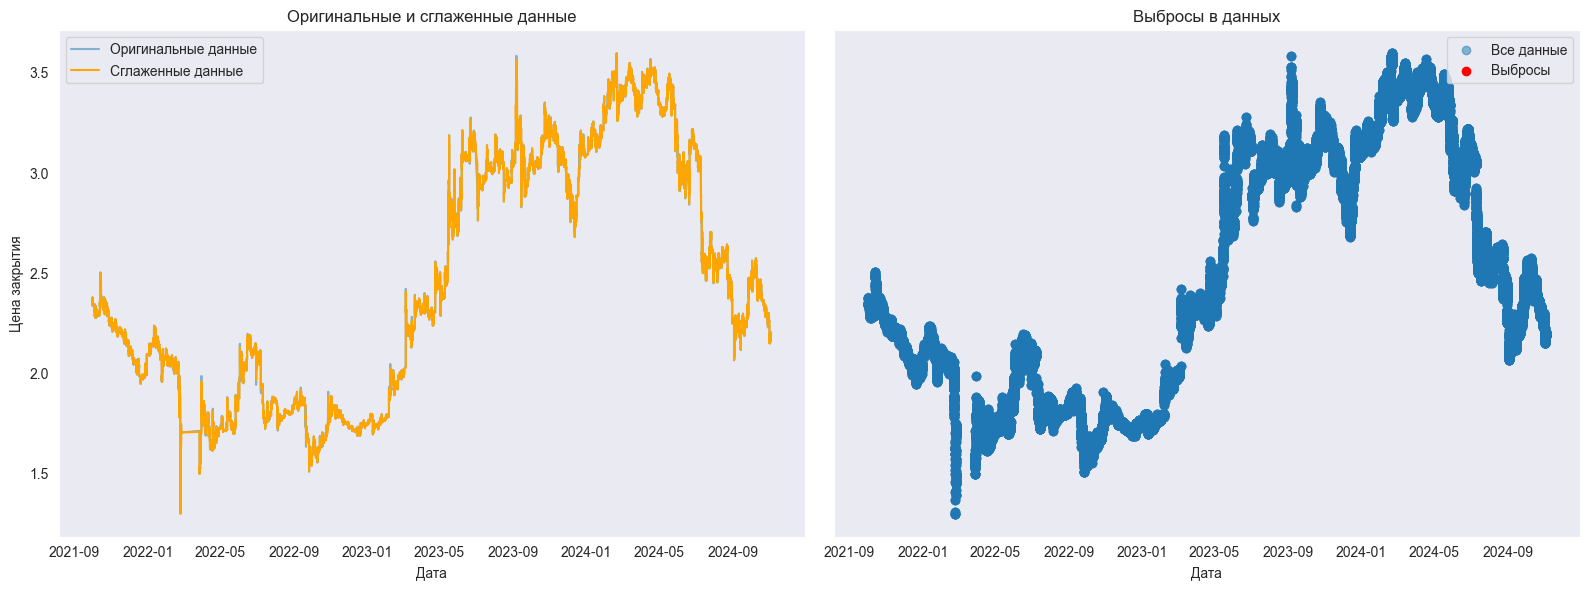

UPRO_moex_10m_data.csv - Количество выбросов: 0


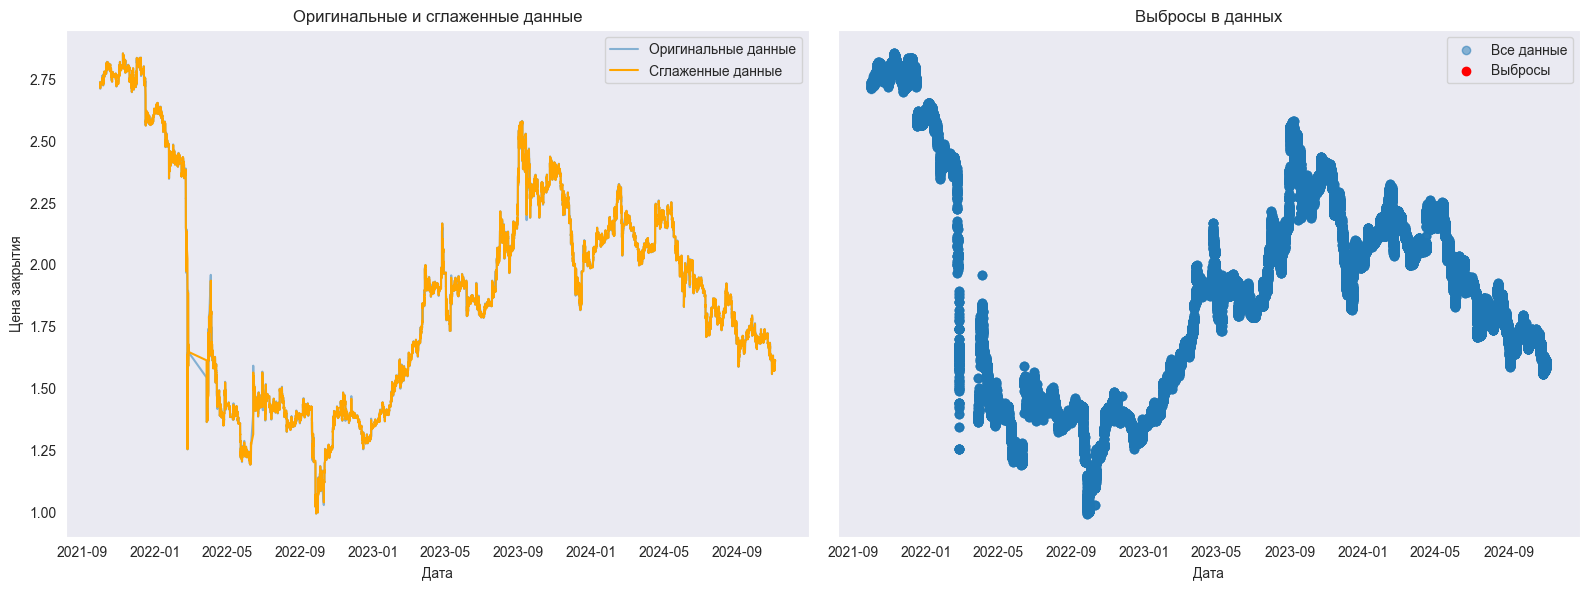

TATN_moex_10m_data.csv - Количество выбросов: 0


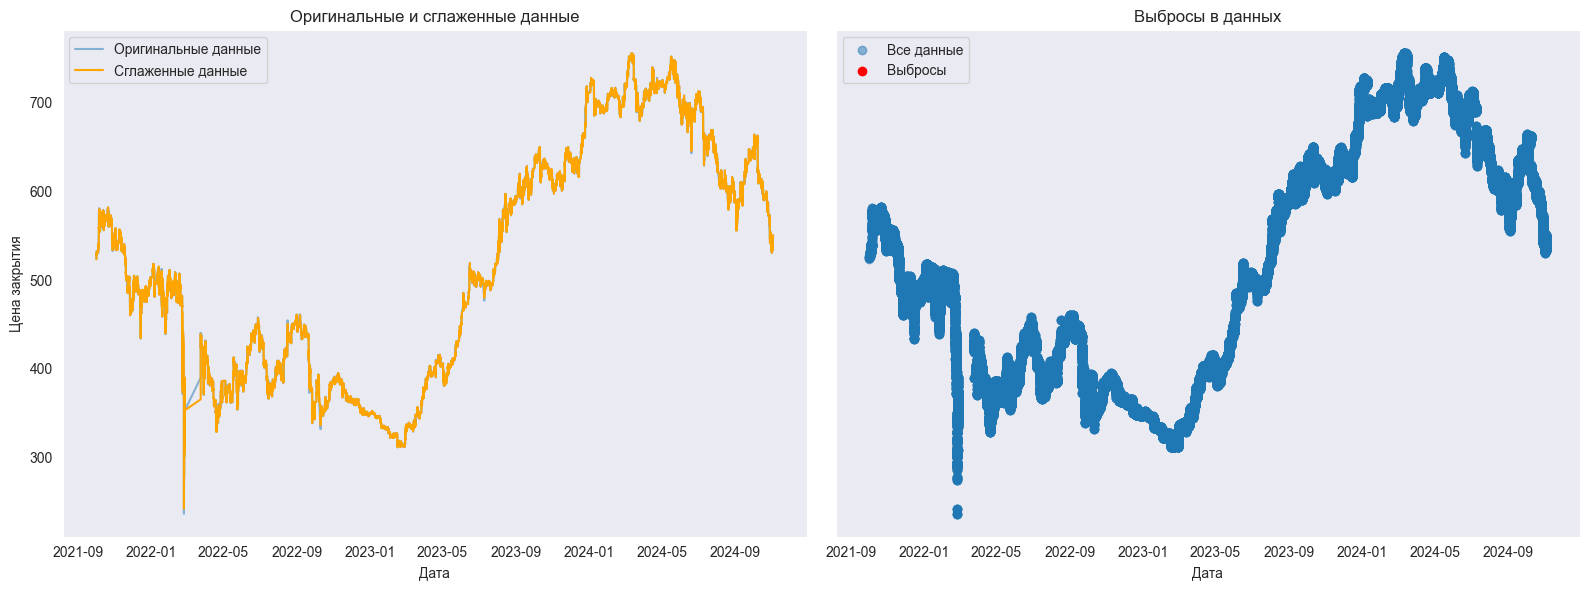

SNGS_moex_10m_data.csv - Количество выбросов: 1430


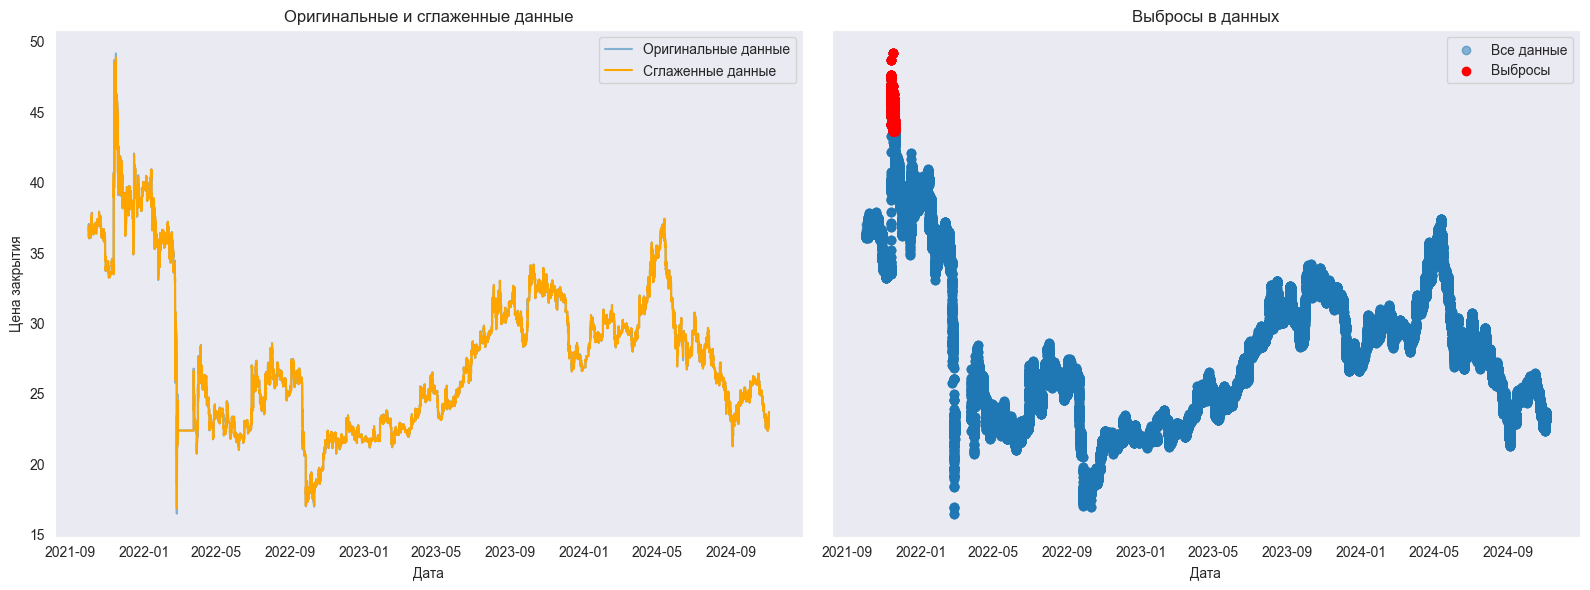

ENPG_moex_10m_data.csv - Количество выбросов: 41060


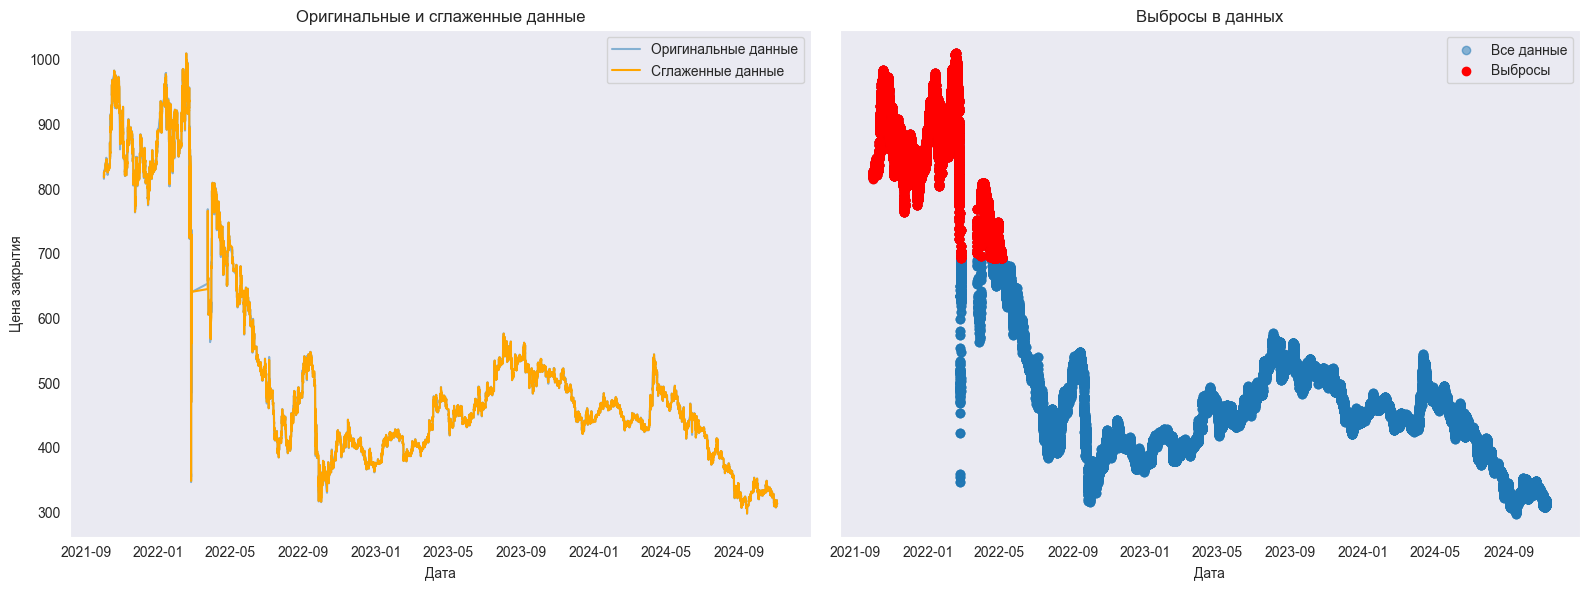

ALRS_moex_10m_data.csv - Количество выбросов: 44600


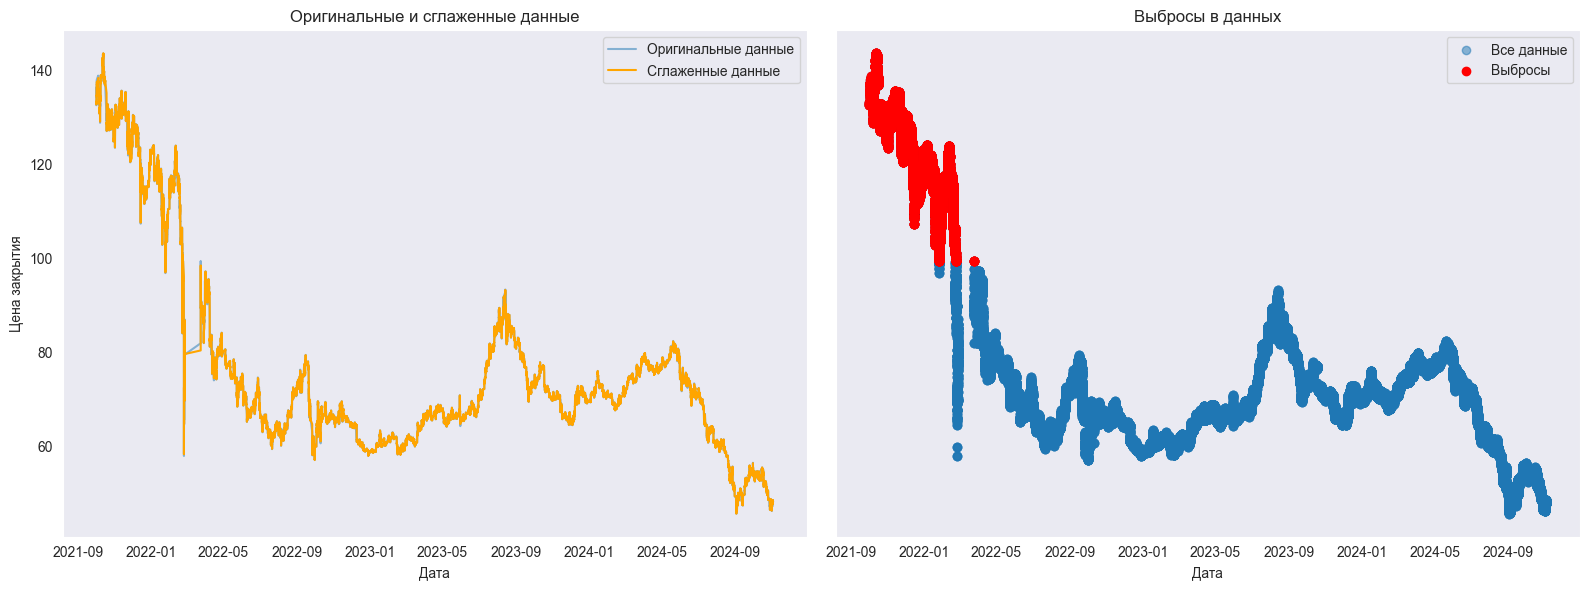

HYDR_moex_10m_data.csv - Количество выбросов: 28390


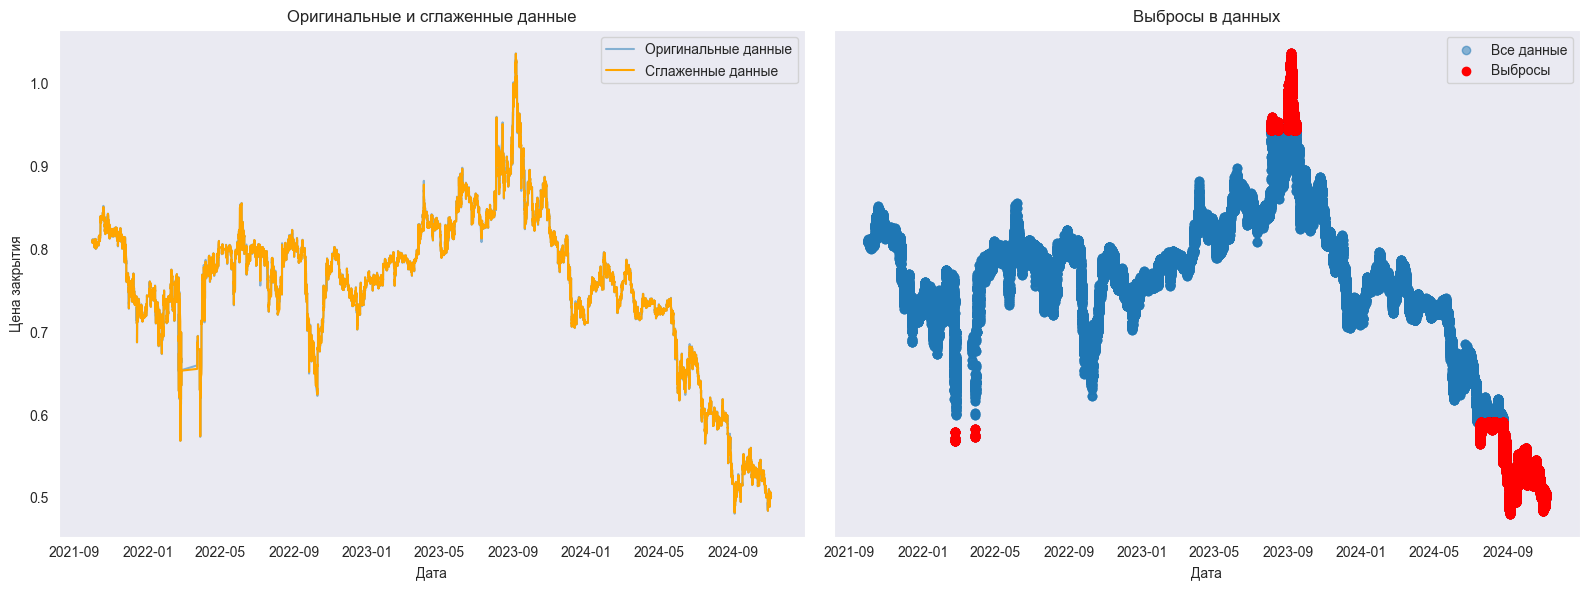

AGRO_moex_10m_data.csv - Количество выбросов: 0


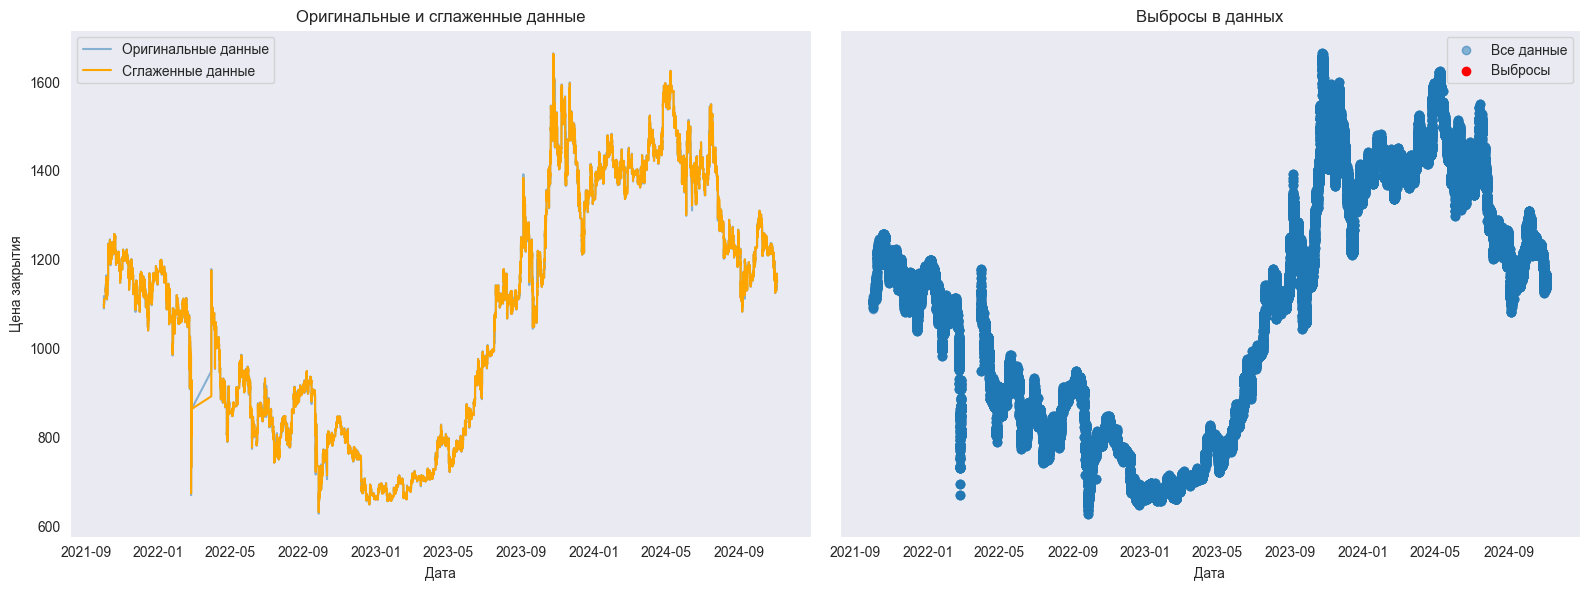

VTBR_moex_10m_data.csv - Количество выбросов: 44755


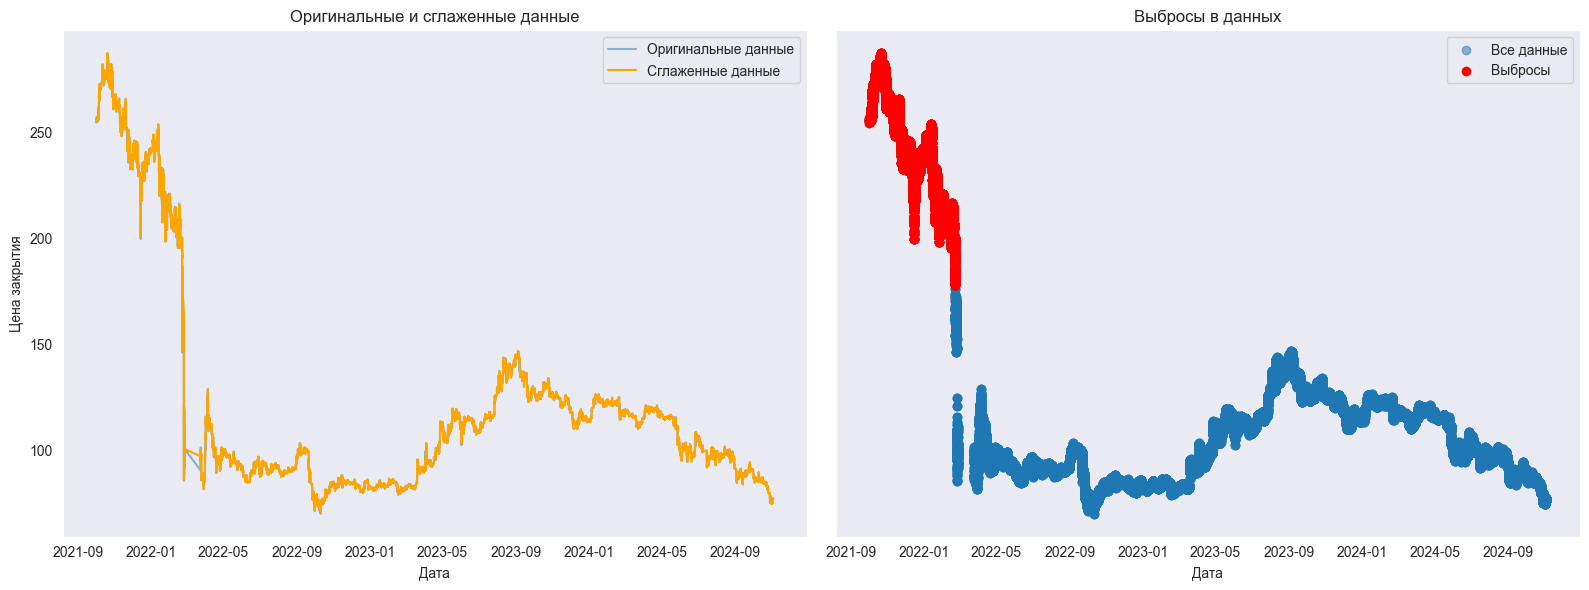

IRAO_moex_10m_data.csv - Количество выбросов: 975


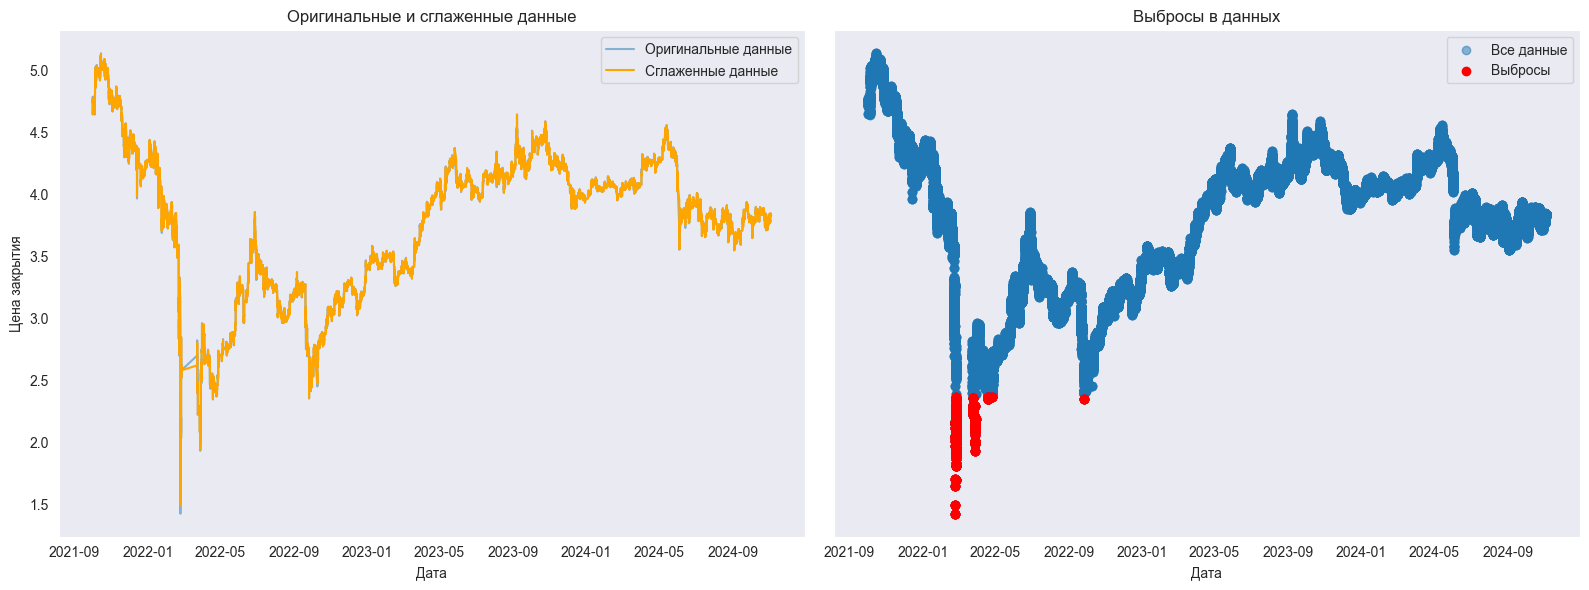

ASTR_moex_10m_data.csv - Количество выбросов: 1860


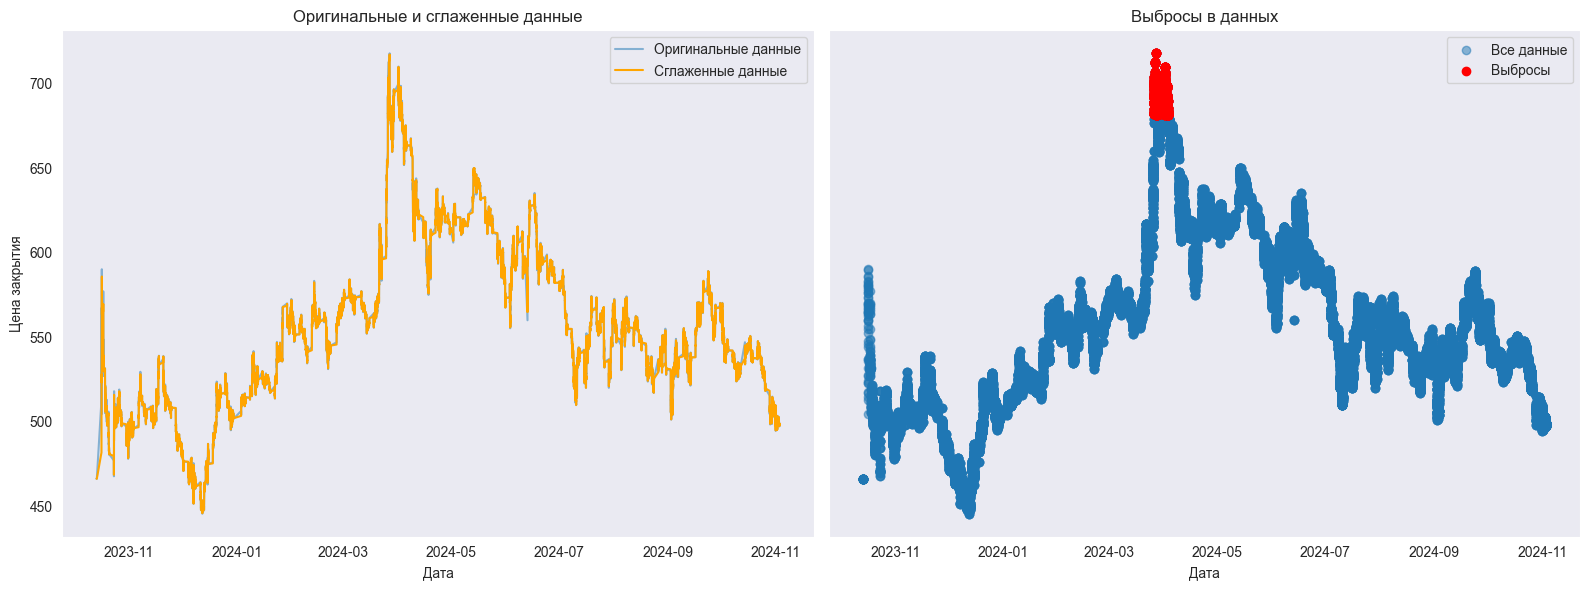

MTLR_moex_10m_data.csv - Количество выбросов: 0


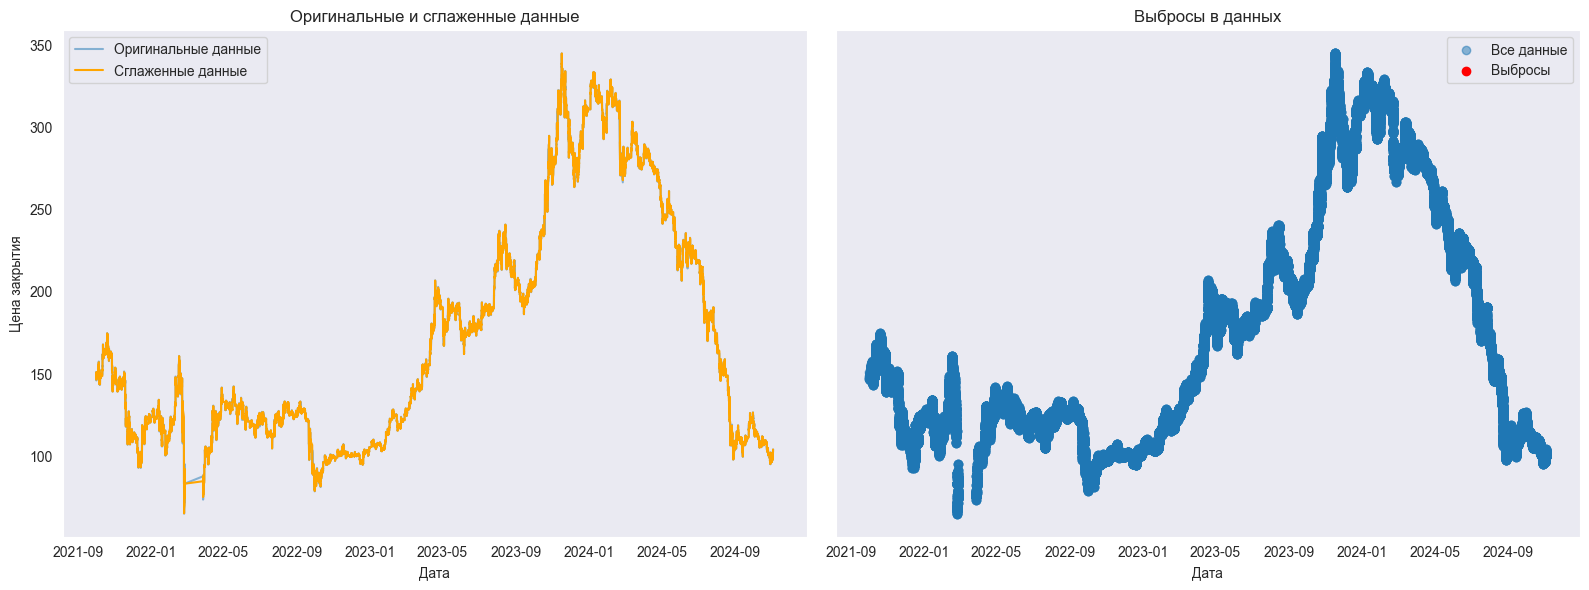

YDEX_moex_10m_data.csv - Количество выбросов: 1


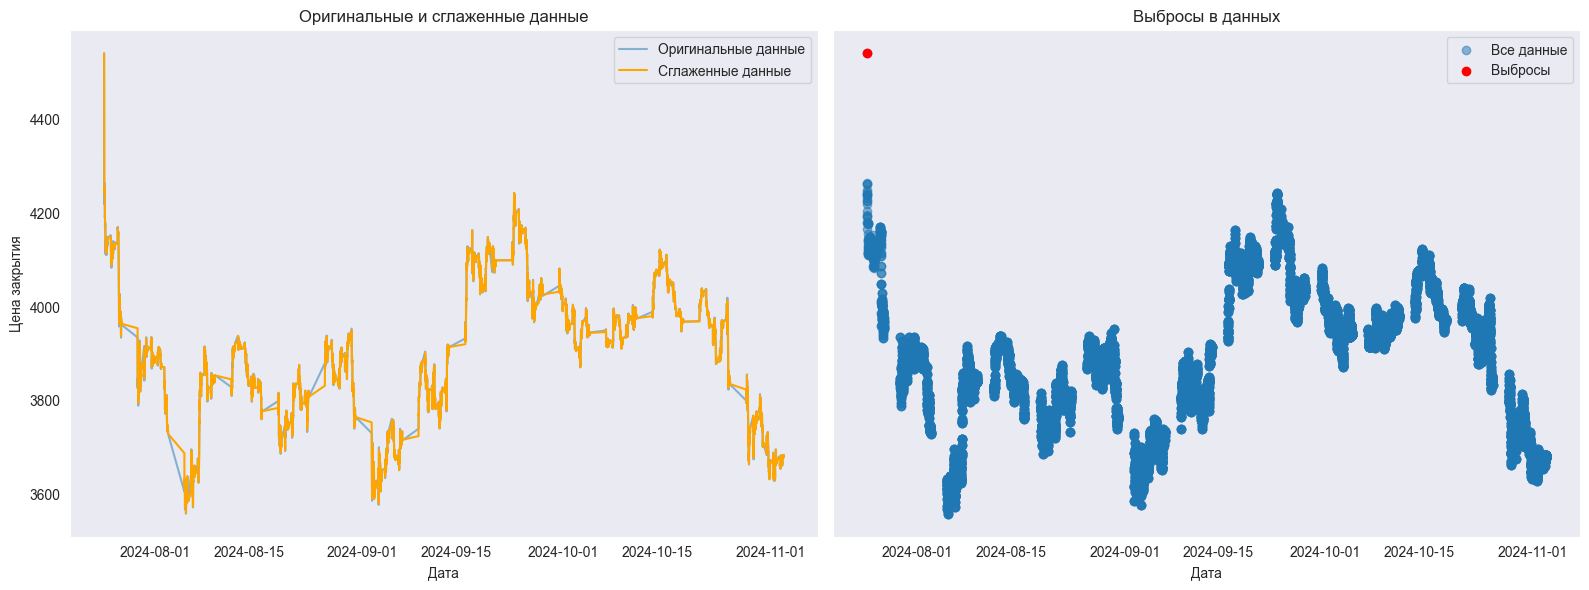

In [3]:
for file_path in file_paths:
    data = pd.read_csv(file_path)
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    data = data.sort_values(by='Datetime')

    # Проверяем выбросы
    Q1 = data['Close'].quantile(0.25)
    Q3 = data['Close'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data['Close'] < lower_bound) | (data['Close'] > upper_bound)]

    print(f"{os.path.basename(file_path)} - Количество выбросов: {len(outliers)}")

    # Проверка на шумы с сглаживанием
    data['Close_Smoothed'] = data['Close'].ewm(span=5).mean()
    
    # ориг + сглаженные
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    axes[0].plot(data['Datetime'], data['Close'], label='Оригинальные данные', alpha=0.5)
    axes[0].plot(data['Datetime'], data['Close_Smoothed'], label='Сглаженные данные', color='orange')
    axes[0].set_title('Оригинальные и сглаженные данные')
    axes[0].set_xlabel('Дата')
    axes[0].set_ylabel('Цена закрытия')
    axes[0].legend()
    axes[0].grid()

    # выбросы
    axes[1].scatter(data['Datetime'], data['Close'], label='Все данные', alpha=0.5)
    axes[1].scatter(outliers['Datetime'], outliers['Close'], color='red', label='Выбросы')
    axes[1].set_title('Выбросы в данных')
    axes[1].set_xlabel('Дата')
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.show()